In [41]:
import math
import nwslpy
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
players = nwslpy.load_players()
seasons = list(map(lambda x: str(x), filter(lambda x: x != 2020, range(2016,2023))))
stats = pd.concat(
    [nwslpy.load_player_season_stats("RGN", season) for season in seasons]
)
stats

,player_id,team_id,season,open_play_crosses_unsuccessful,minutes,throw_ins_to_own_player,lay_offs_successful,launches_successful,goals,passes_open_play,...,goals_other,drops,assists_second,gk_smother,goals_conceded_penalty,tackled,goals_home,goals_away,goals_win,red_cards_2nd_yellow
0,150,6,2016,17,1776,117,1,12,1,1068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,158,6,2016,2,1005,9,0,12,1,652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,137,6,2016,1,46,1,0,0,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141,6,2016,3,274,3,1,0,0,111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,151,6,2016,5,157,0,1,0,0,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,140,6,2022,50,1021,31,5,4,7,448,...,NaN,0.0,NaN,0.0,2.0,49.0,4.0,3.0,5.0,1.0
21,123,6,2022,0,402,0,0,2,0,146,...,NaN,0.0,NaN,0.0,1.0,9.0,0.0,0.0,0.0,0.0
22,599,6,2022,0,2070,0,0,30,0,169,...,NaN,6.0,NaN,6.0,4.0,0.0,0.0,0.0,0.0,0.0
23,665,6,2022,2,1352,1,0,2,0,601,...,NaN,0.0,NaN,0.0,3.0,16.0,0.0,0.0,0.0,0.0


In [24]:
df = stats.groupby(["player_id", "season"]).first()
df = df.join(players[["player_match_name"]])
df

team_id  open_play_crosses_unsuccessful  minutes  \
player_id season                                                     
26        2018          6                               5      694   
          2019          6                               3      138   
49        2021          6                              68     2106   
          2022          6                              82     1740   
55        2019          6                              23     1066   
...                   ...                             ...      ...   
661       2022          6                               0        2   
665       2022          6                               2     1352   
666       2022          6                               0       80   
667       2022          6                               0      126   
721       2022          6                               0      848   

                  throw_ins_to_own_player  lay_offs_successful  \
player_id season                                                 
26        2018                         77                    0   
          2019                         18                    0   
49        2021                         99                   11   
          2022                        205                    1   
55        2019                         14                    2   
...                                   ...                  ...   
661       2022                          2                    0   
665       2022                          1                    0   
666       2022                          0                    0   
667       2022                          0                    4   
721       2022                          1                    9   

                  launches_successful  goals  passes_open_play  corners_won  \
player_id season                                                              
26        2018                      3      0               226            1   
          2019                      1      0                61            0   
49        2021                      2      1               882           11   
          2022                      3      1               842            8   
55        2019                      2      2               301            8   
...                               ...    ...               ...          ...   
661       2022                      0      0                 4            0   
665       2022                      2      0               601            1   
666       2022                      0      0                16            0   
667       2022                      0      1                67            0   
721       2022                      0      2               233           11   

                  passes_backwards  ...  drops  assists_second  gk_smother  \
player_id season                    ...                                      
26        2018                  44  ...    0.0             0.0         0.0   
          2019                  13  ...    0.0             0.0         0.0   
49        2021                 221  ...    0.0             0.0         NaN   
          2022                 149  ...    0.0             NaN         0.0   
55        2019                  47  ...    0.0             0.0         0.0   
...                            ...  ...    ...             ...         ...   
661       2022                   0  ...    0.0             NaN         0.0   
665       2022                  83  ...    0.0             NaN         0.0   
666       2022                   3  ...    0.0             NaN         0.0   
667       2022                  16  ...    0.0             NaN         0.0   
721       2022                  58  ...    0.0             NaN         0.0   

                  goals_conceded_penalty  tackled  goals_home  goals_away  \
player_id season                                                            
26        2018                       NaN      NaN  

In [48]:
def player_summary(name):
    subset = df[df["player_match_name"] == name].dropna(axis=1)

    plt.clf()
    plt.rcParams["figure.figsize"] = (24, 50)
    cols = 5
    fig, axs = plt.subplots(math.ceil(len(subset.columns) / cols), cols)

    for i, col in enumerate(subset.columns):
        ax = axs[int(i / cols), i % cols]
        ax.plot(subset.index.get_level_values(1), subset[col])
        ax.set_title(col)

    plt.tight_layout()

<Figure size 1728x3600 with 0 Axes>

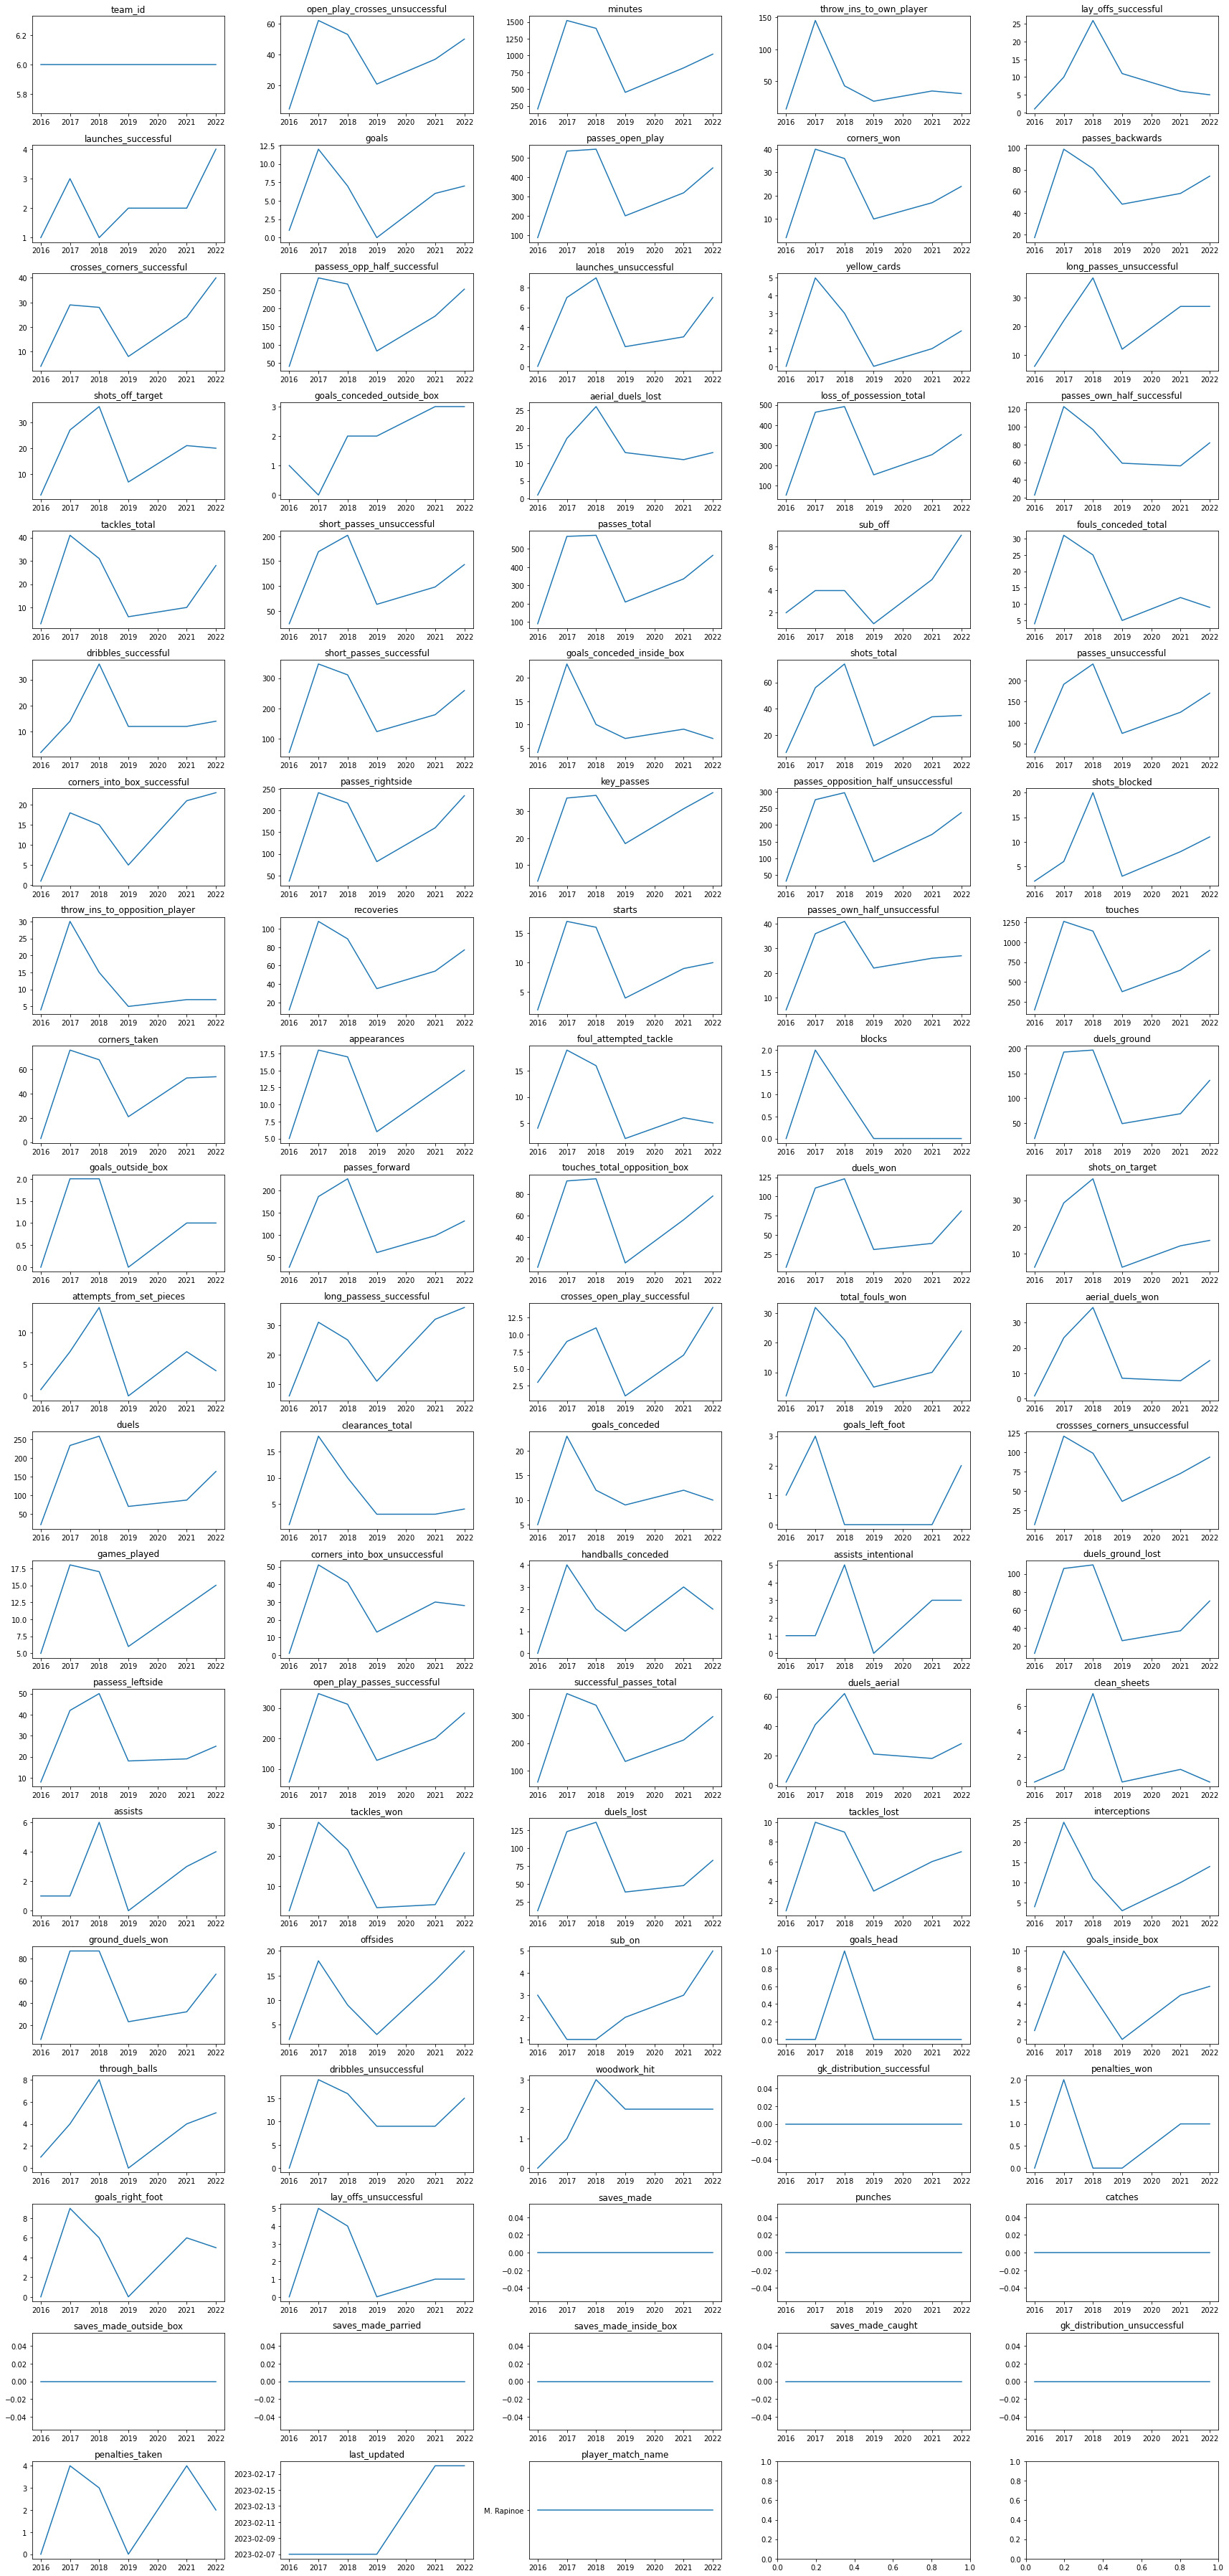

In [49]:
player_summary("M. Rapinoe")

<Figure size 1728x3600 with 0 Axes>

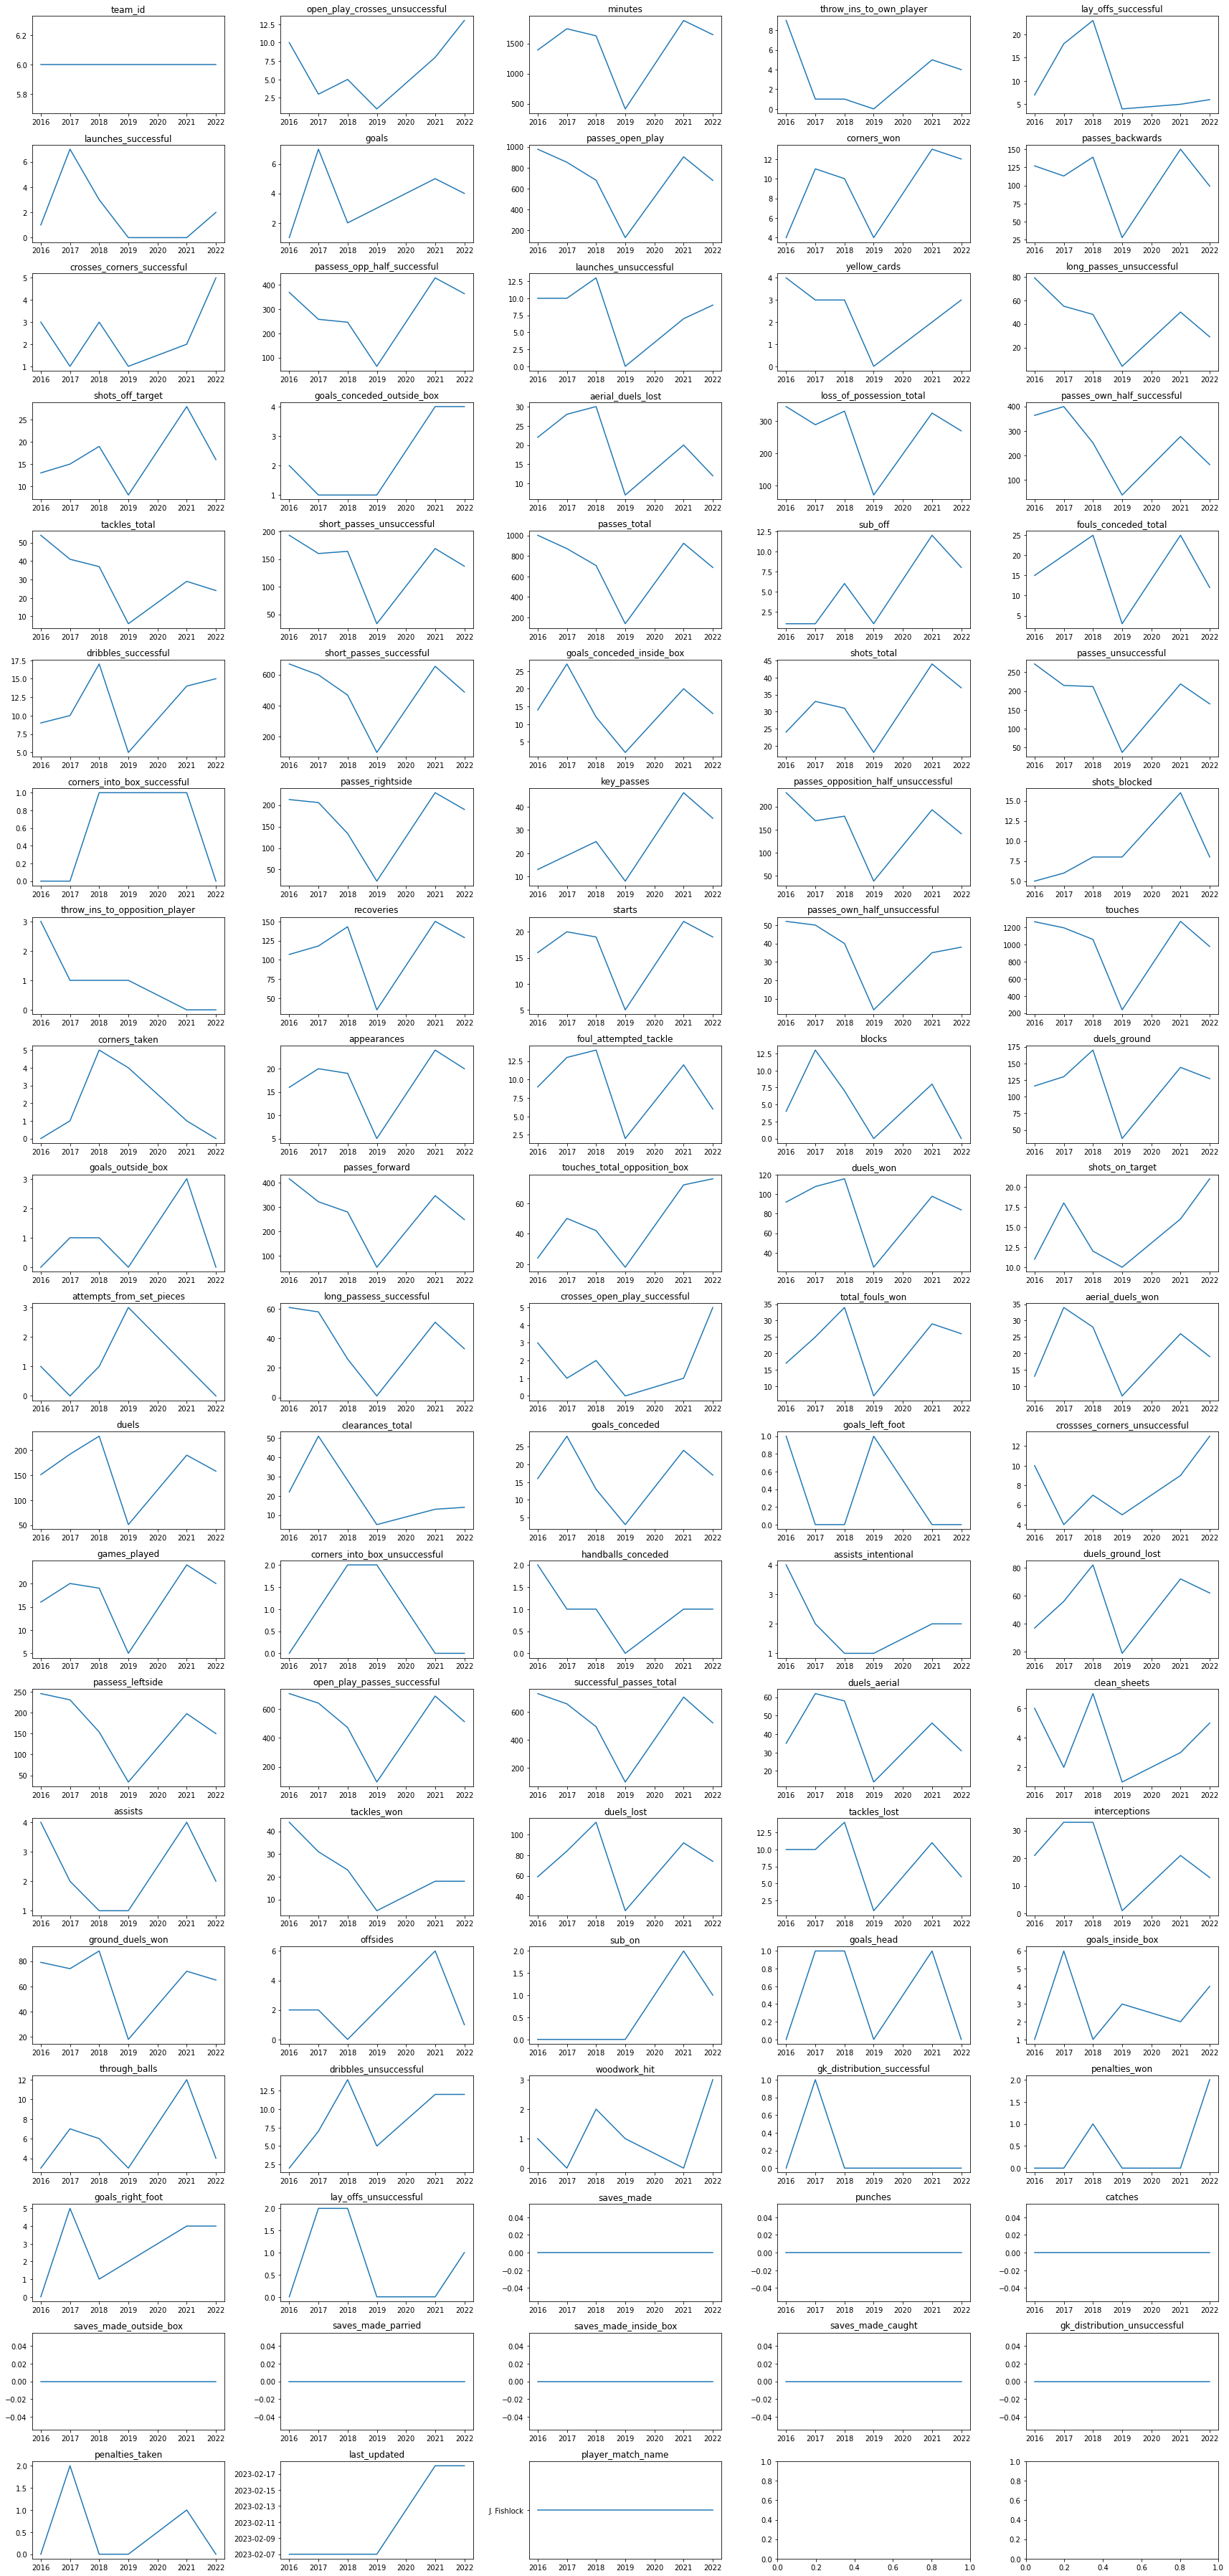

In [50]:
player_summary("J. Fishlock")

<Figure size 1728x3600 with 0 Axes>

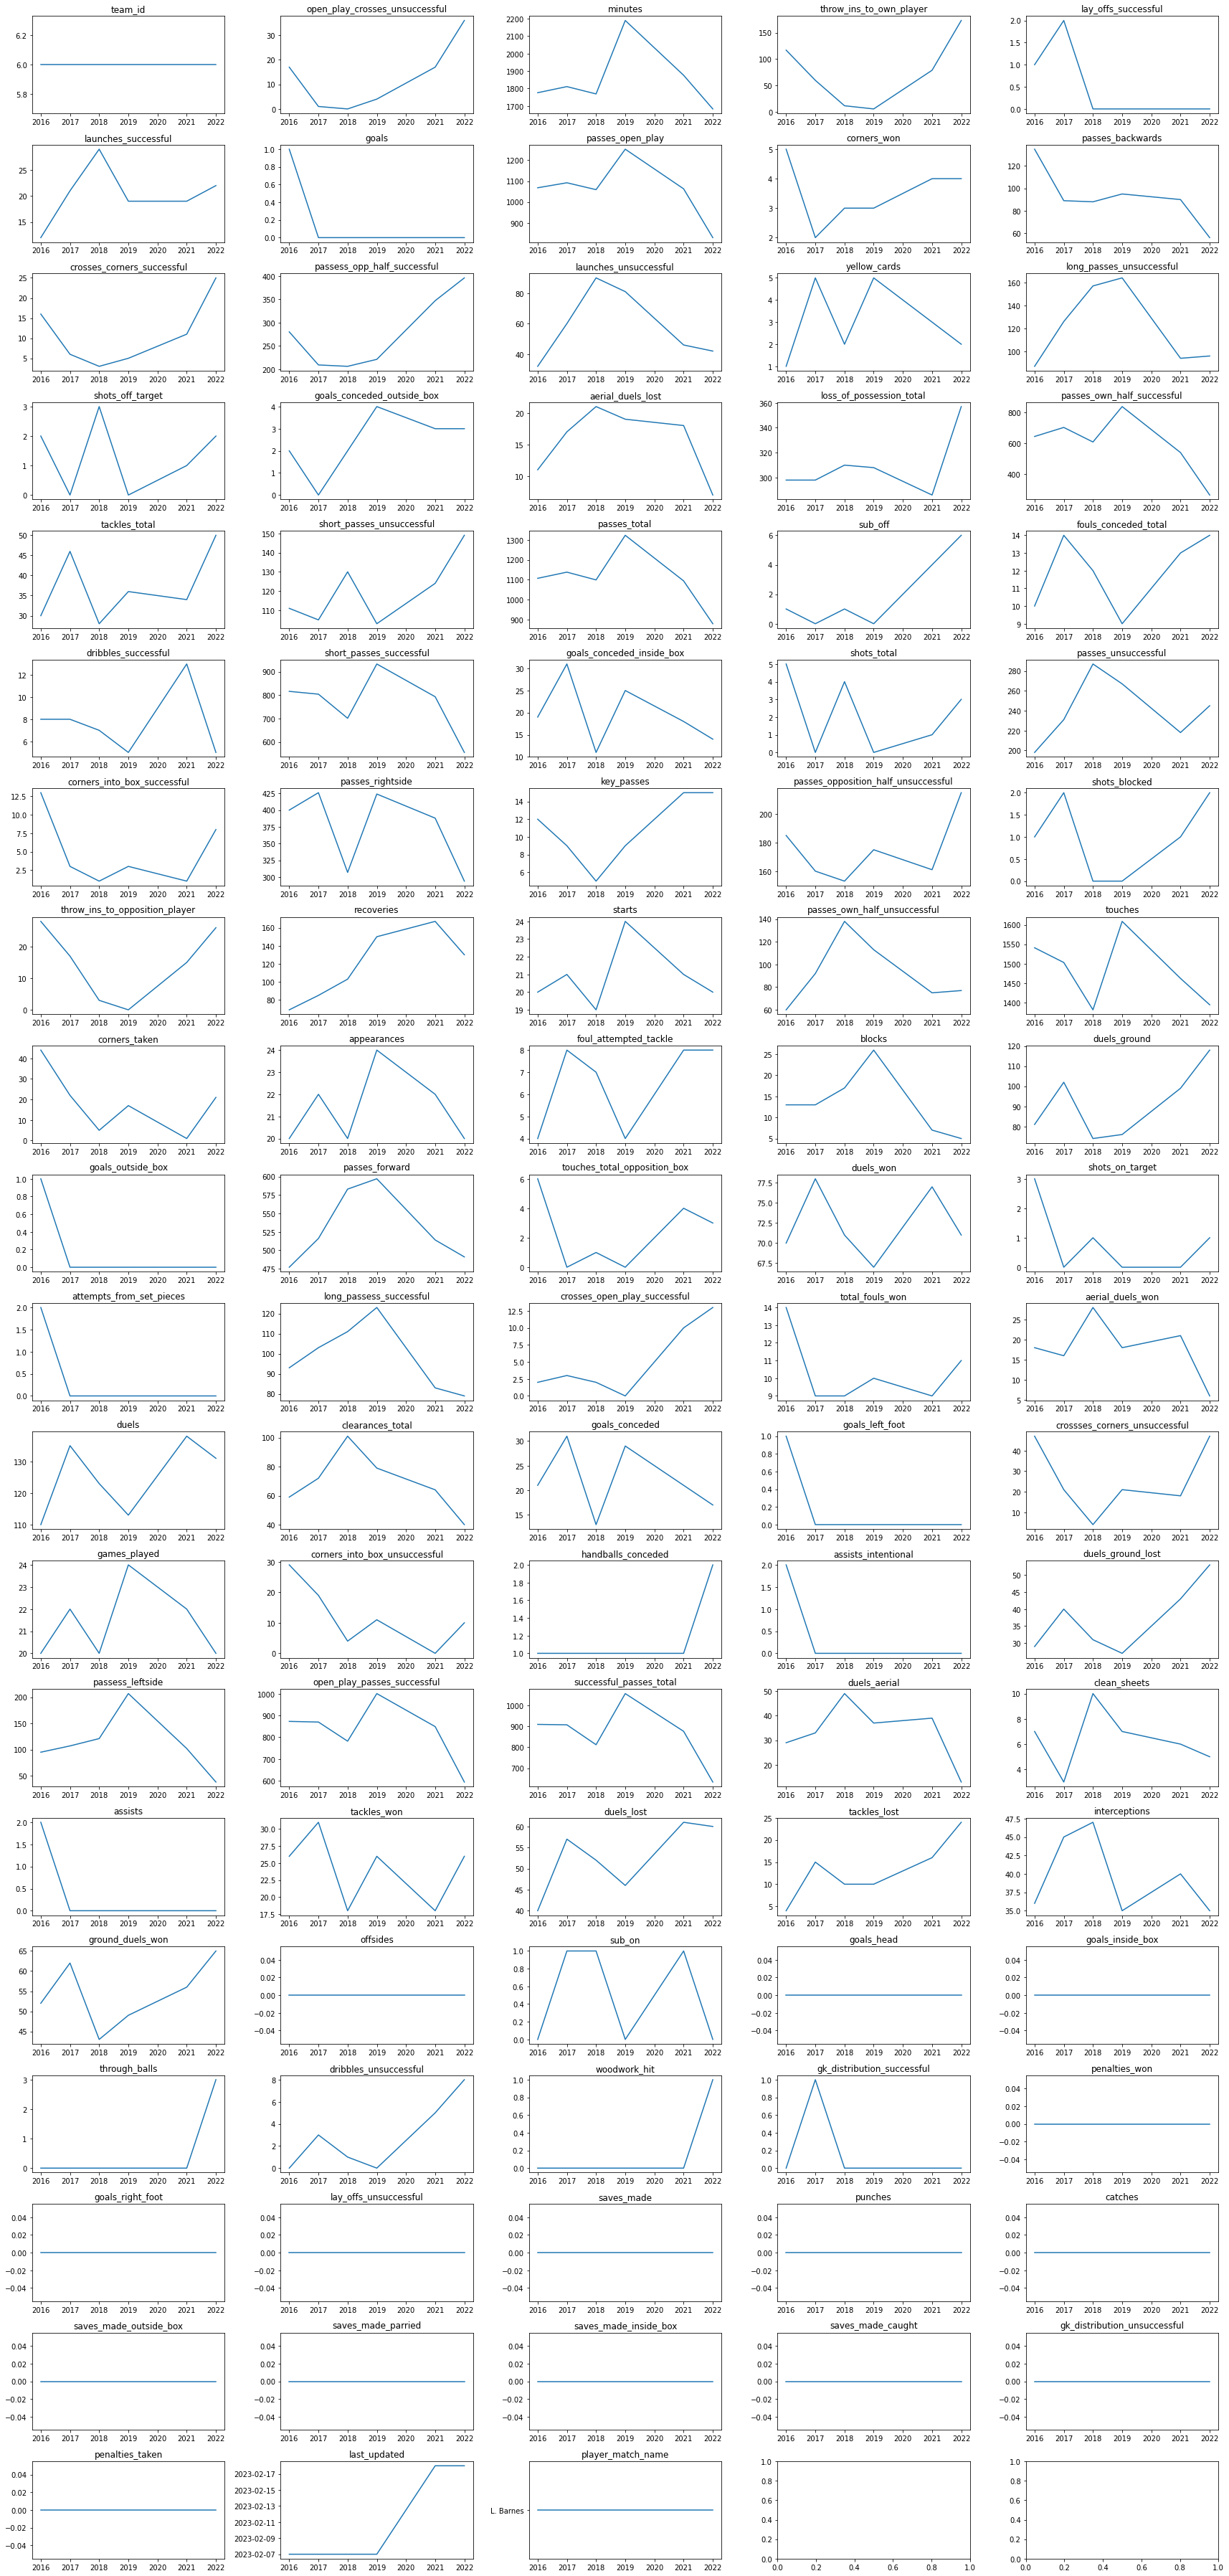

In [51]:
player_summary("L. Barnes")

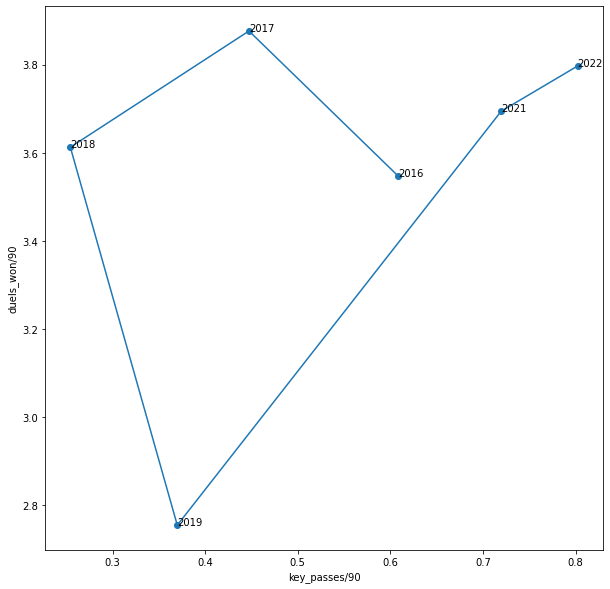

In [67]:
def plot_circular_scatter(name, a, a_per_90, b, b_per_90):
    subset = df[df["player_match_name"] == name].dropna(axis=1)
    
    x = subset[a]
    if a_per_90:
        x = x * 90 / subset["minutes"]
    y = subset[b]
    if b_per_90:
        y = y * 90 / subset["minutes"]
    t = subset.index.get_level_values(1)
    
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.clf()
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.xlabel(a + ("/90" if a_per_90 else ""))
    plt.ylabel(b + ("/90" if b_per_90 else ""))
    for i, txt in enumerate(t):
        plt.annotate(txt, (x.iloc[i], y.iloc[i]))

    
plot_circular_scatter("L. Barnes", "key_passes", True, "duels_won", True)

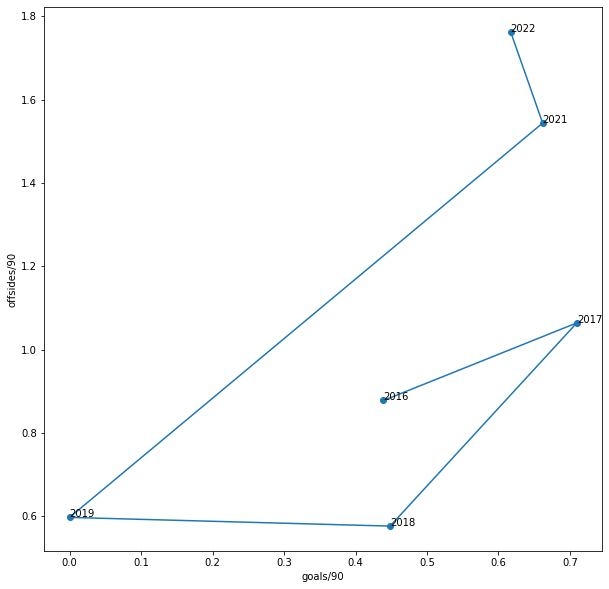

In [69]:
plot_circular_scatter("M. Rapinoe", "goals", True, "offsides", True)

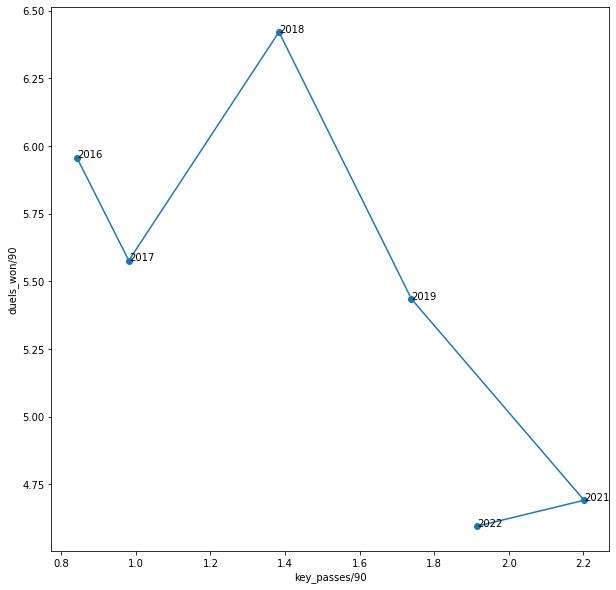

In [68]:
plot_circular_scatter("J. Fishlock", "key_passes", True, "duels_won", True)